In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
X=df.drop(columns=['Strength'])
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.6275531792314852

In [13]:
#crsoss checkcing with cross val score
lr= LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.4609940491662864

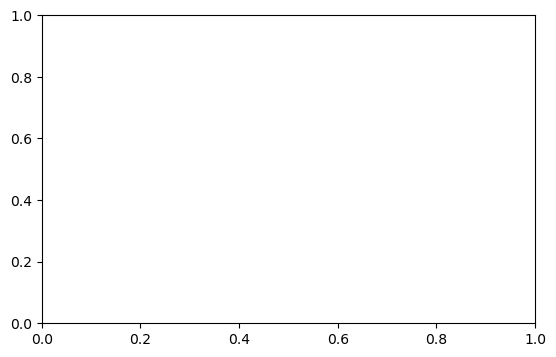

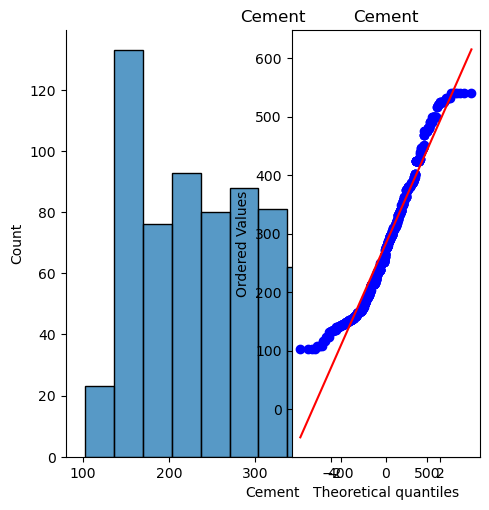

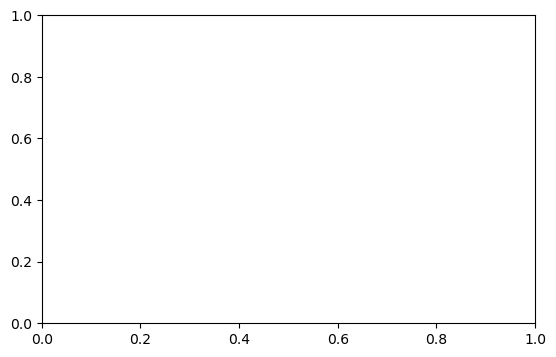

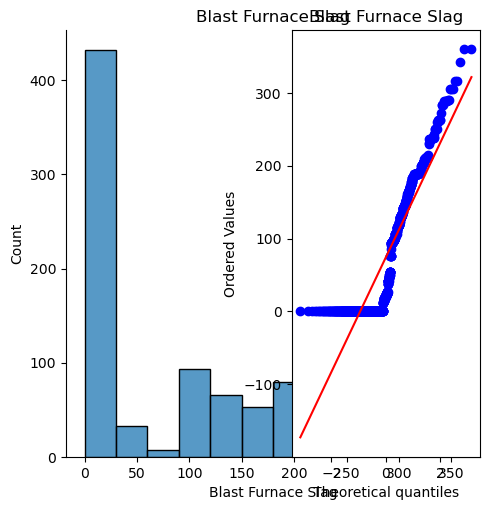

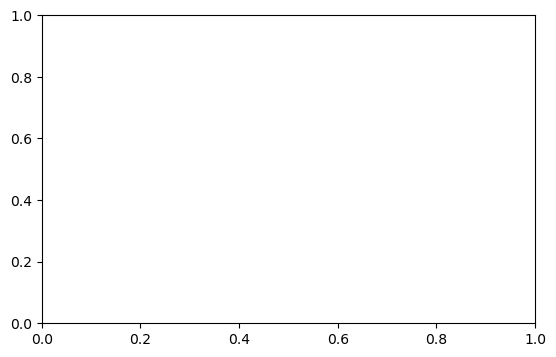

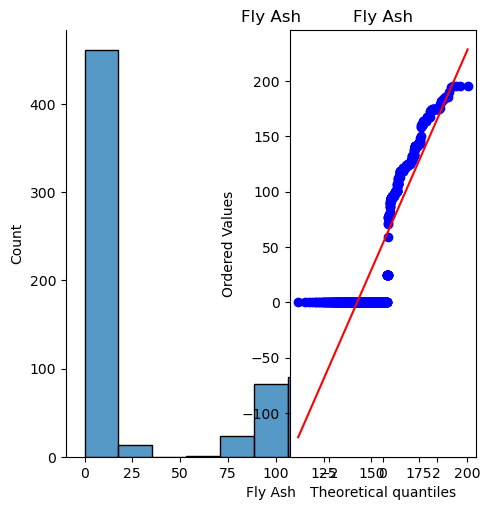

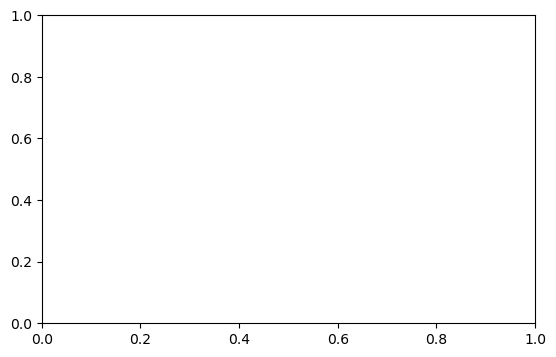

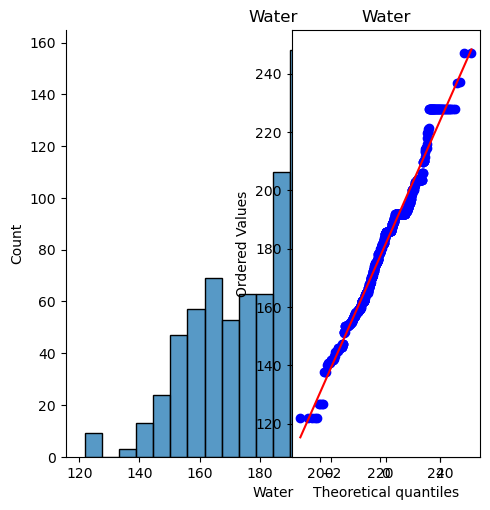

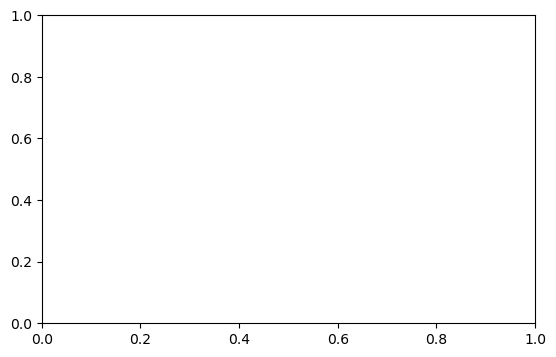

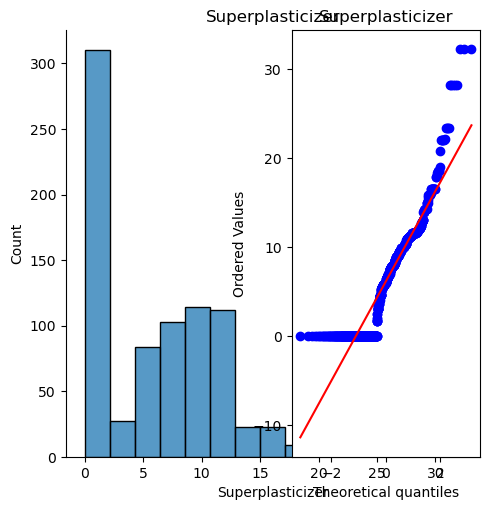

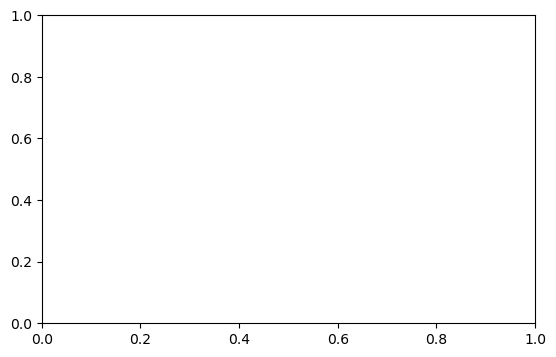

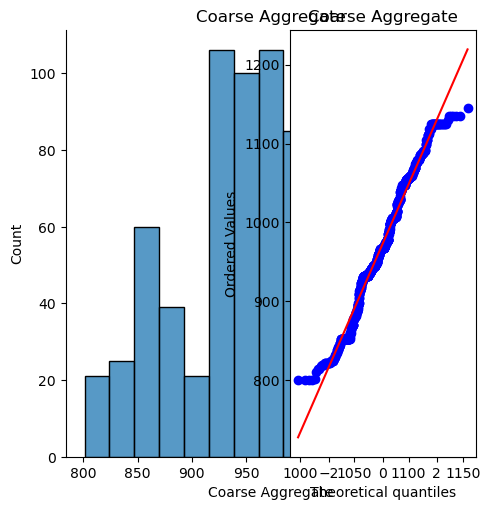

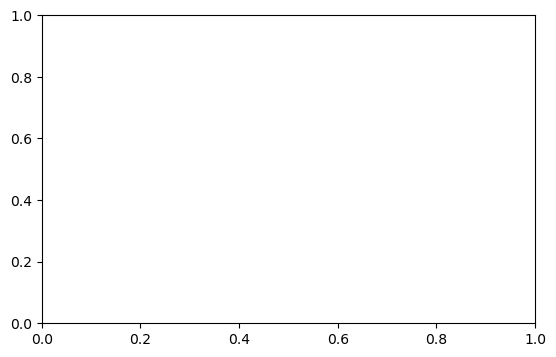

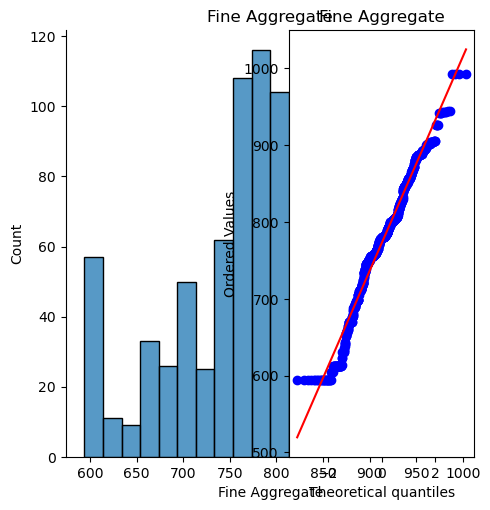

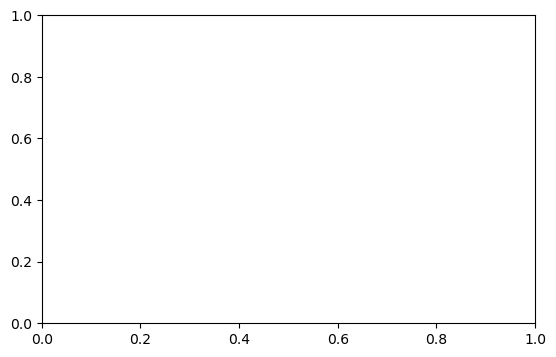

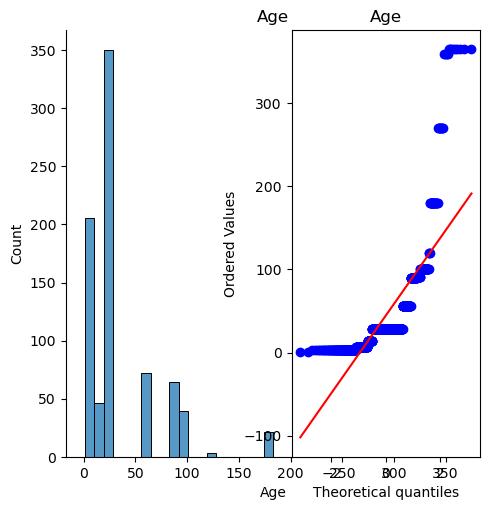

In [21]:
#plotting displot without any transformation
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.displot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist="norm",plot=plt)
    plt.title(col)
    plt.show()




In [23]:
#applying box cox transform
pt= PowerTransformer(method='box-cox')
X_train_transformed=pt.fit_transform(X_train+0.000001)
X_test_transformed=pt.transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})


,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [25]:
#applying linear regression on transformed data
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred2=lr.predict(X_test_transformed)
r2_score(y_test,y_pred2)


0.8047825011695537

In [29]:
#using cross val score
pt = PowerTransformer(method='box-cox')
X_transformed=pt.fit_transform(X+0.000001)
lr=LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6662950324463969

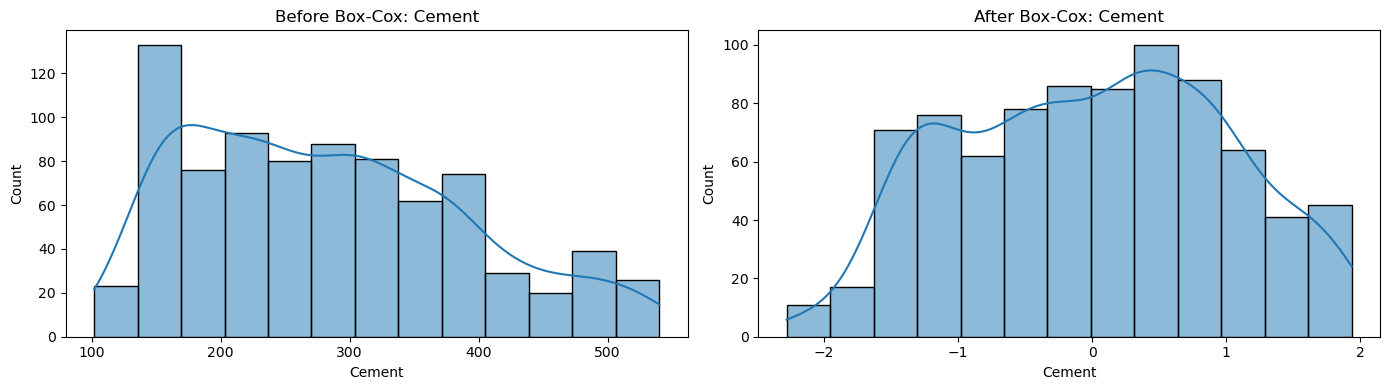

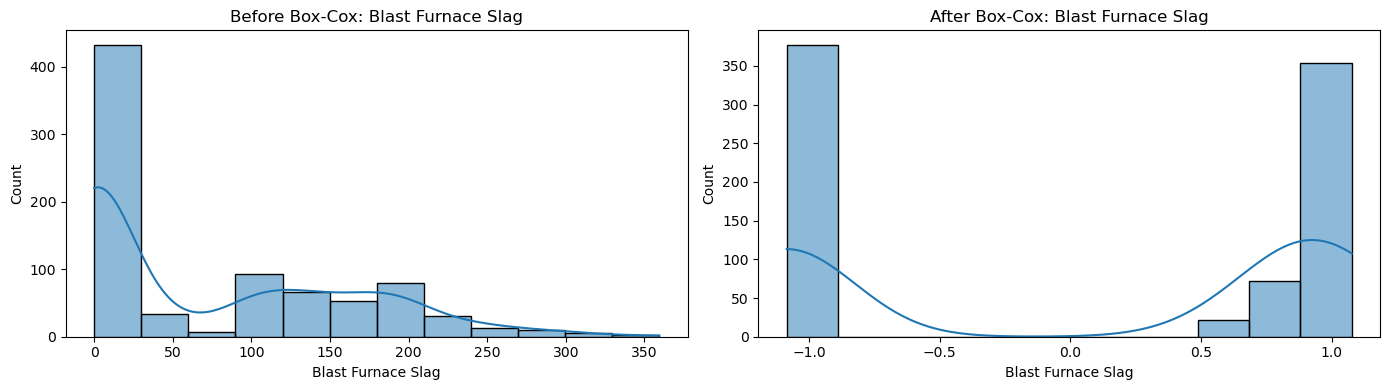

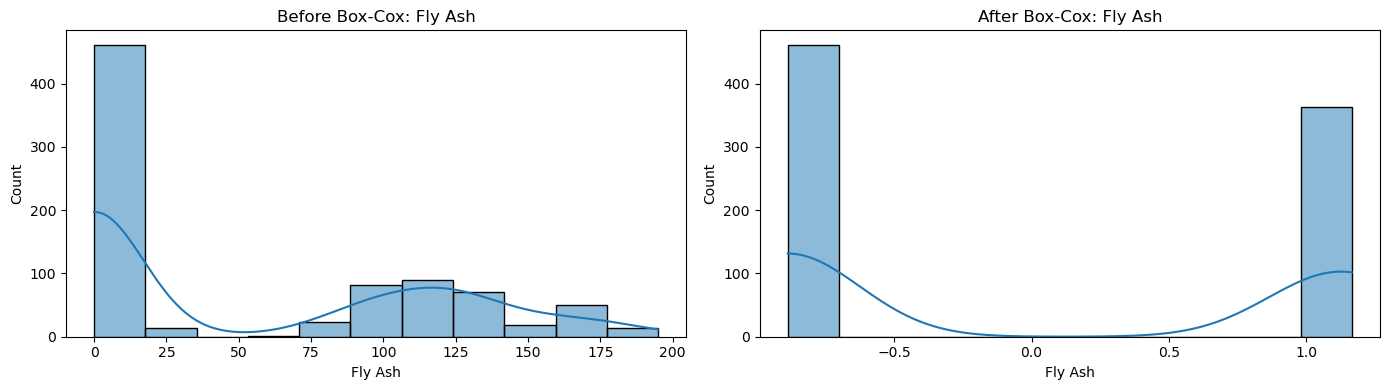

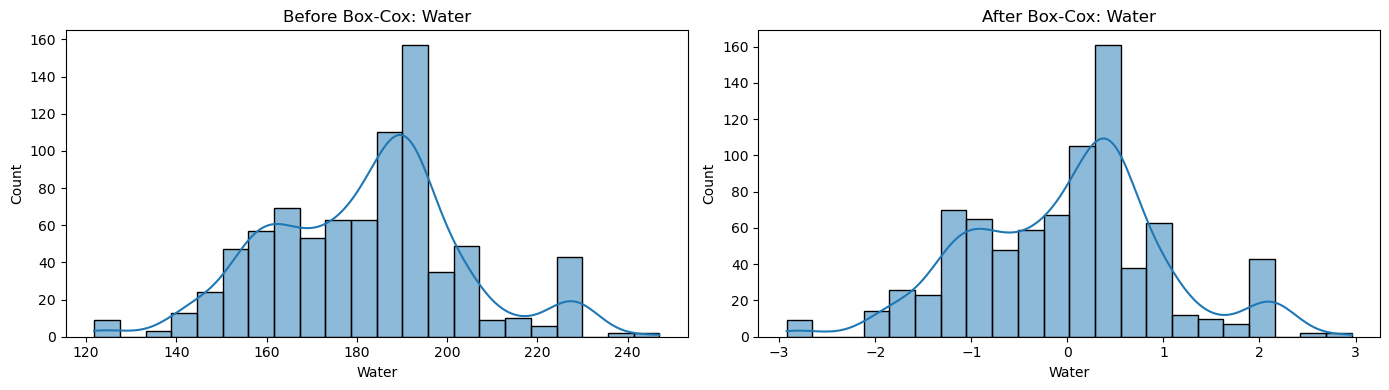

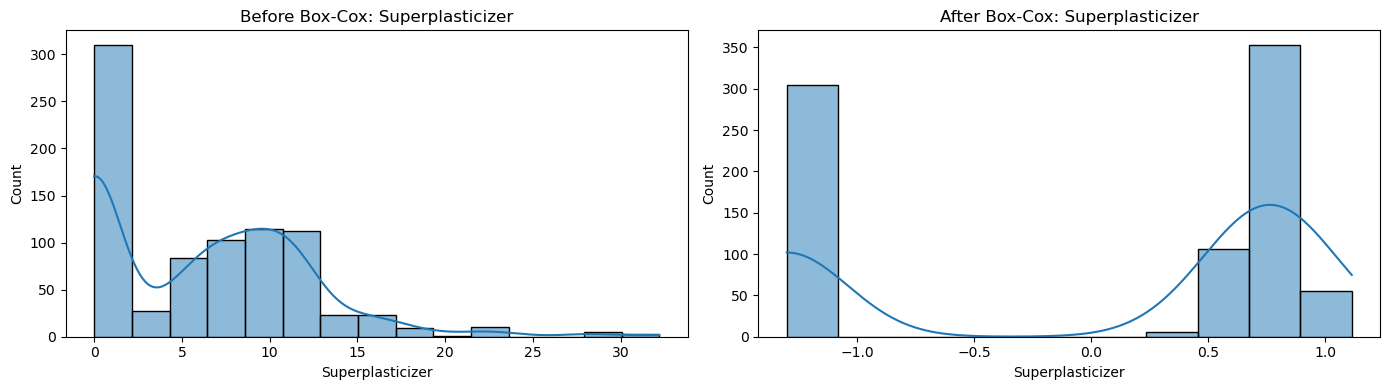

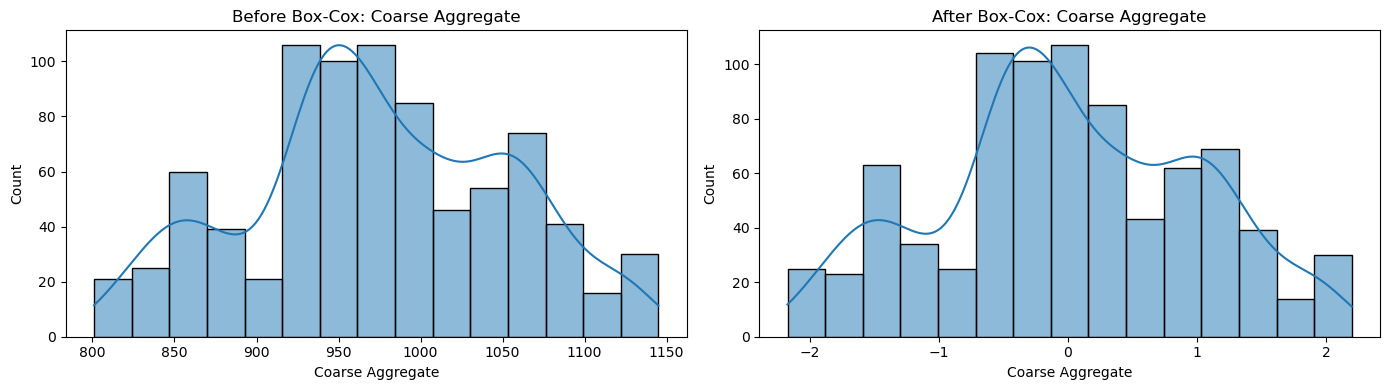

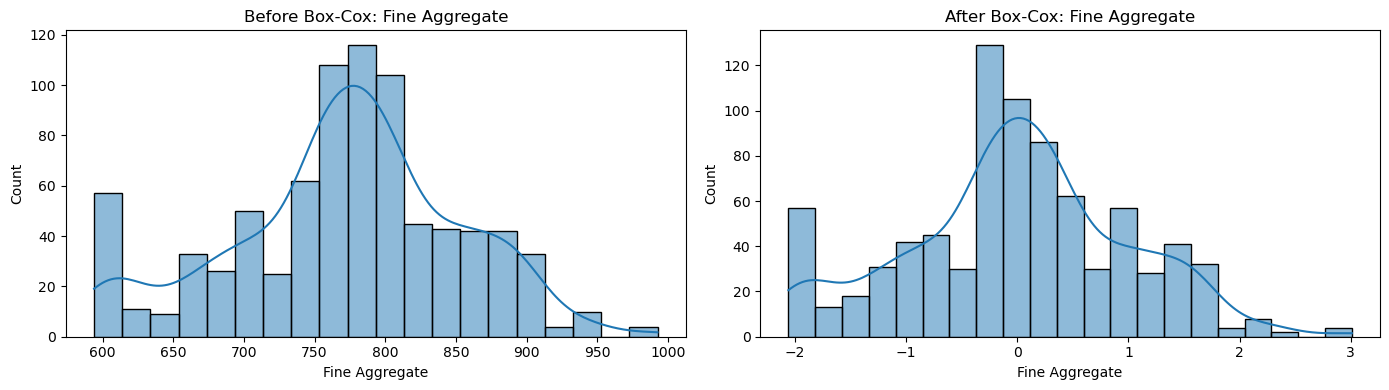

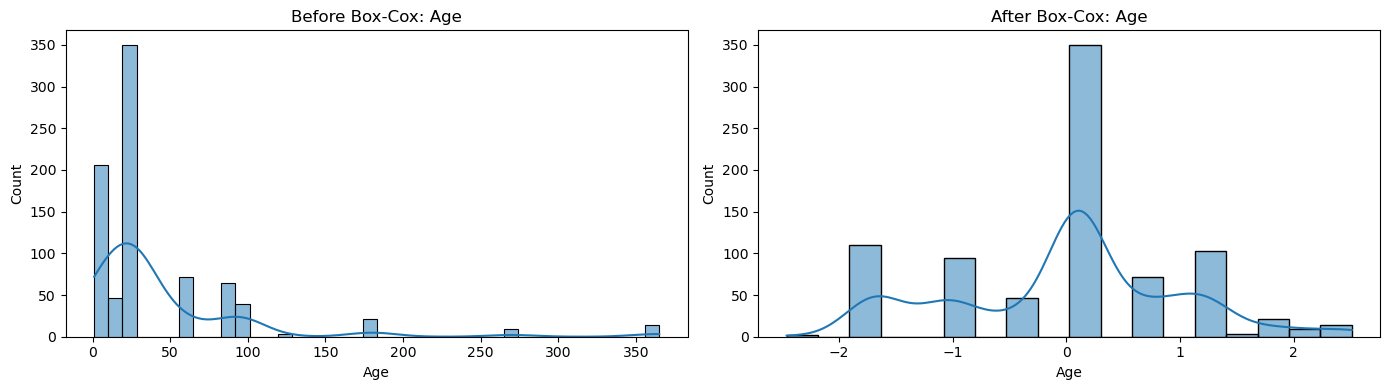

In [35]:
X_train_transformed = pd.DataFrame(
    X_train_transformed,
    columns=X_train.columns
)

# Before vs After Box-Cox comparison
for col in X_train.columns:
    plt.figure(figsize=(14, 4))

    # Before transformation
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f"Before Box-Cox: {col}")

    # After transformation
    plt.subplot(1, 2, 2)
    sns.histplot(X_train_transformed[col], kde=True)
    plt.title(f"After Box-Cox: {col}")

    plt.tight_layout()
    plt.show()